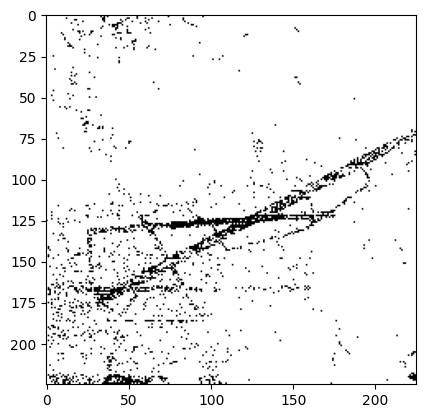

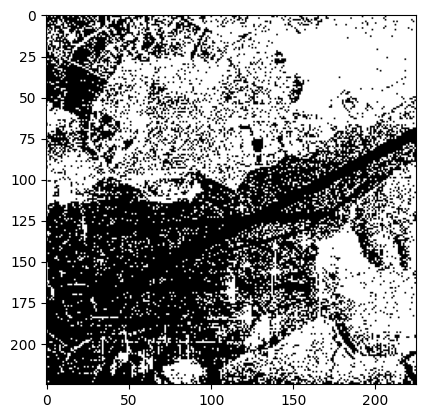

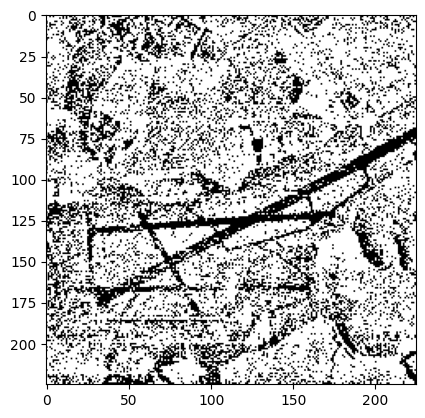

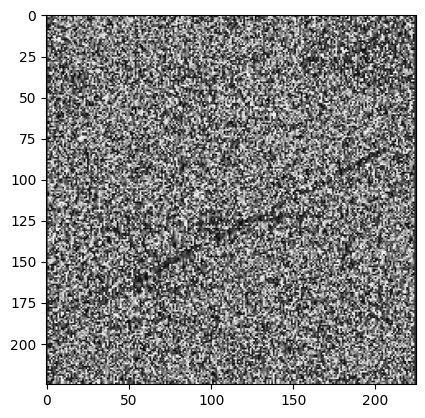

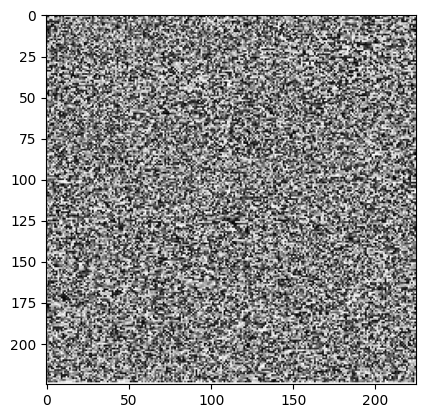

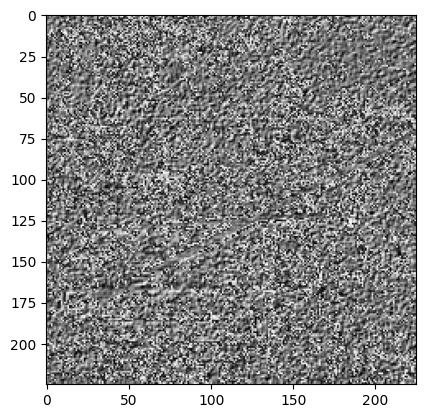

248.29418035870273


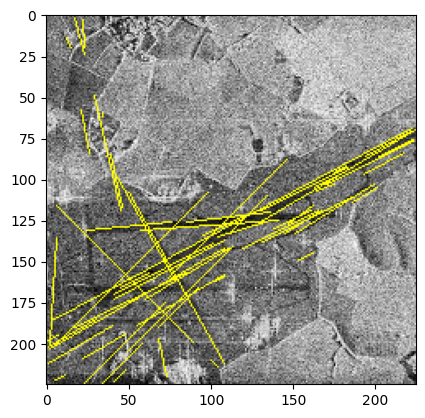

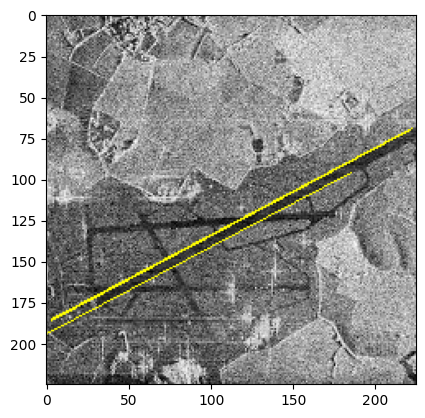

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import copy

image = cv2.imread('sar_3.jpg')
iimage = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#2 задание. Бинаризация
bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255
plt.imshow(bin_img, cmap="gray")
plt.show()


_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(th2, cmap="gray")
plt.show()


th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)
plt.imshow(th3, cmap="gray")
plt.show()


scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")
plt.show()

plt.imshow((grad_y - grad_y.min())*255, cmap="gray")
plt.show()

grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0)
plt.imshow((grad - grad.min())*255, cmap="gray")
plt.show()

#1 задиние. Выделить линии при помощи преобразования Хафа
image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
eq_gray = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
edges = cv2.Canny(bin_img,0,1,apertureSize = 3)
minLineLength = 10
tlines = cv2.HoughLinesP(edges,1,np.pi/180,50,minLineLength,maxLineGap=8)

maxum = 0

for i in range(len(tlines)):
    x1 = tlines[i][0][0]
    y1 = tlines[i][0][1]
    x2 = tlines[i][0][2]
    y2 = tlines[i][0][3]
    cv2.line(image,(x1,y1),(x2,y2),(255,255,0),1)
    tlen = np.sqrt((x2-x1)**2+(y2-y1)**2)
    if (tlen > maxum):
        maxum = tlen

print(maxum)
plt.imshow(image, cmap="gray")
plt.show()

image1 = cv2.imread('sar_3.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_RGB2BGR) 
eq_gray1 = cv2.equalizeHist(cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)) 
image_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY) 

bin_img1 = copy.deepcopy(eq_gray1)
T  = 16
bin_img1[eq_gray1 < T] = 0
bin_img1[eq_gray1 >= T] = 255
plt.imshow(bin_img1, cmap="gray")

edges1 = cv2.Canny(bin_img1,0,1,apertureSize = 5)
minLineLength1 = 10
tlines1 = cv2.HoughLinesP(edges1,1,np.pi/180,100,minLineLength,maxLineGap=10)

for i in range(len(tlines1)):
    x1 = tlines1[i][0][0]
    y1 = tlines1[i][0][1]
    x2 = tlines1[i][0][2]
    y2 = tlines1[i][0][3]
    #print(x1, y1, x2, y2)
    cv2.line(image1,(x1,y1),(x2,y2),(255,255,0),1)
plt.imshow(image1, cmap="gray")